# Sales Forecasting and Optimization

This project aims to predict future sales for a retail or e-commerce 
business by using historical sales data.

Data set: Time-series retail dataset, contains daily records for multiple products across different store for Corporacion Favorita supermarket chain.

This notebook aims to make exploratory data analysis (EDA) to :
o Understand trends, seasonality, and missing values in the dataset. 
o Generate summary statistics, check for outliers, and identify key patterns and correlations.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# read csv file, parse the date column as datetime
dataset = pd.read_csv("train_sample.csv", parse_dates=['date'])
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  int64         
 6   day          int64         
 7   month        int64         
 8   dayofweek    int64         
 9   family       object        
 10  city         object        
 11  state        object        
 12  type         object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 198.4+ MB


In [44]:
dataset.describe()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek
count,2.000000e+06,2000000,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,2013-01-26 02:37:45.033600512,2.332825e+01,7.672631e+02,8.551026e+00,5.483465e-01,1.389499e+01,1.394018e+00,3.046715e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,-2.070000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.999998e+05,2013-01-14 00:00:00,1.000000e+01,3.660000e+02,2.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,9.999995e+05,2013-01-26 00:00:00,2.300000e+01,7.420000e+02,4.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,3.000000e+00
75%,1.499999e+06,2013-02-07 00:00:00,3.600000e+01,1.165000e+03,9.000000e+00,1.000000e+00,1.900000e+01,2.000000e+00,5.000000e+00
max,1.999999e+06,2013-02-19 00:00:00,5.400000e+01,1.624000e+03,7.001000e+03,1.000000e+00,3.100000e+01,2.000000e+00,6.000000e+00
std,5.773504e+05,NaN,1.377641e+01,4.638120e+02,1.965433e+01,4.976573e-01,8.232678e+00,4.886389e-01,2.006730e+00


In [4]:
# check for missing values
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
day            0
month          0
dayofweek      0
family         0
city           0
state          0
type           0
dtype: int64


There is no missing values in the dataset

In [5]:
# check for duplicates
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

0


There is no duplicates in the dataset

•	Onpromotion distribution: proportion of promoted vs. non-promoted items.

In [6]:
# get the count for promoted and non-promoted sales
promotion_counts = dataset['onpromotion'].value_counts()
promotion_counts

onpromotion
1    1096693
0     903307
Name: count, dtype: int64

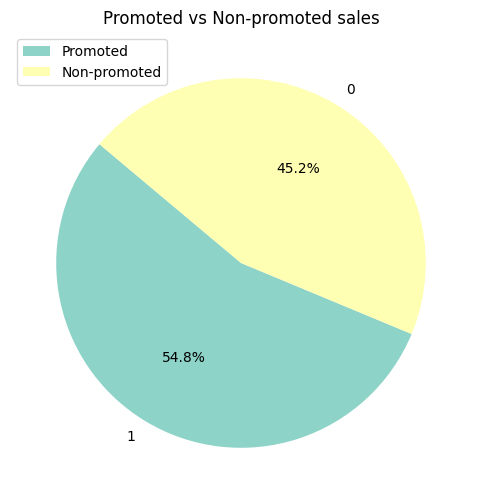

In [94]:
plt.figure(figsize=(12, 6))
plt.pie(promotion_counts.values, labels=promotion_counts.index, autopct='%1.1f%%', startangle=140,colors=plt.cm.Set3.colors)
plt.title("Promoted vs Non-promoted sales")
plt.legend(['Promoted', 'Non-promoted'], loc='upper left')
plt.show()

number of sales made during promotions are greater than those without promotions

•	Product family sales share: bar chart of Product categories

In [12]:
# get the count for each product category
family_categories = dataset['family']
family_counts = family_categories.value_counts()
family_counts

family
GROCERY I                     650658
BEVERAGES                     298981
CLEANING                      217606
PRODUCE                       149298
DAIRY                         118047
PERSONAL CARE                  74639
BREAD/BAKERY                   65385
HOME CARE                      52687
DELI                           44403
MEATS                          40991
HOME AND KITCHEN I             37551
LIQUOR,WINE,BEER               35595
FROZEN FOODS                   26831
POULTRY                        26348
HOME AND KITCHEN II            21958
EGGS                           20007
CELEBRATION                    15126
PREPARED FOODS                 12678
LAWN AND GARDEN                12670
LADIESWEAR                     10248
LINGERIE                        9760
AUTOMOTIVE                      9755
BEAUTY                          9264
PLAYERS AND ELECTRONICS         8292
SCHOOL AND OFFICE SUPPLIES      7317
PET SUPPLIES                    6832
GROCERY II                     

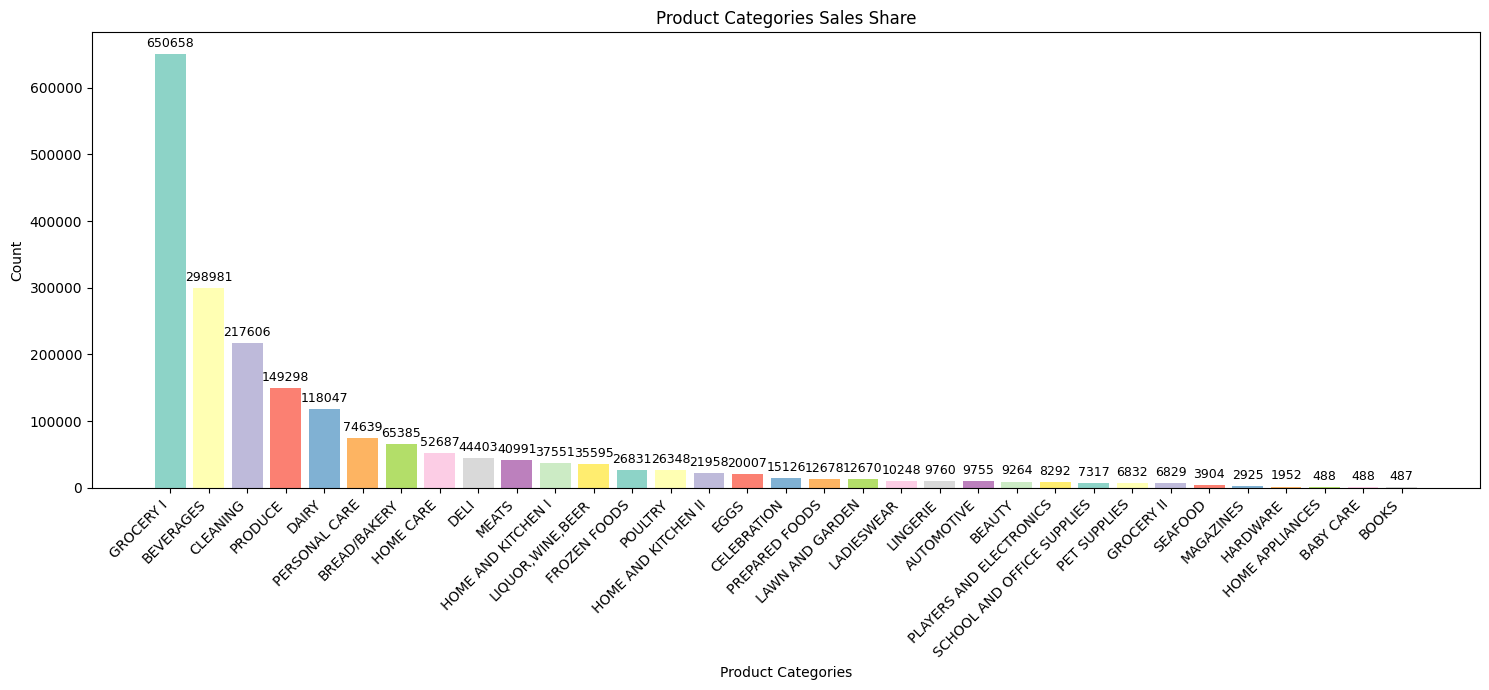

In [36]:
plt.figure(figsize=(15, 7))
bars = plt.bar(family_counts.index, family_counts.values, color=plt.cm.Set3.colors)
plt.bar_label(bars, fontsize=9, padding=3)
plt.title("Product Categories Sales Share")
plt.xlabel("Product Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

•	Sales by Day of Week: bar chart to see avg sales across days of the week

In [43]:
# group the data by dow and compute the avg for unit_sales per dow
avg_sales_by_dow = dataset.groupby(by='dayofweek')['unit_sales'].mean()
avg_sales_by_dow

dayofweek
0     7.858437
1     7.525689
2     8.219205
3     7.240532
4     7.977523
5    10.342351
6    10.439770
Name: unit_sales, dtype: float64

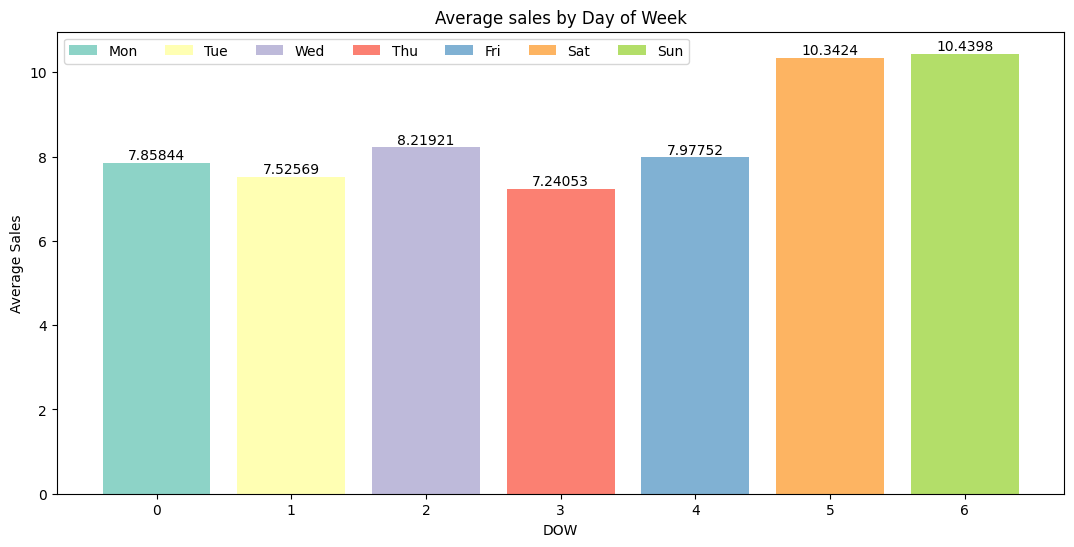

In [56]:
plt.figure(figsize=(13, 6))
bars = plt.bar(avg_sales_by_dow.index, avg_sales_by_dow.values, color=plt.cm.Set3.colors, label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.bar_label(bars)
plt.title("Average sales by Day of Week")
plt.xlabel("DOW")
plt.ylabel("Average Sales")
plt.legend(loc='upper left', ncol=7)
plt.show()

Average sales on Saturday and Sunday are higher than the rest day sof the week.

•	Avg sales for each week of the year: line plot of weekly sales

In [75]:
# craete a week column from the date column to use it for aggregation
dataset['week'] = dataset['date'].dt.isocalendar().week
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type,week
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,1
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,1
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B,1
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B,1
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B,1


In [65]:
# group the data by the created week column and computer the avreage for unit_sale for each week of the year
avg_sales_by_week = dataset.groupby(by='week')['unit_sales'].mean()
avg_sales_by_week

week
1    10.693628
2     8.495559
3     8.341768
4     8.034102
5     8.533999
6     8.099574
7     8.436116
8     7.887950
Name: unit_sales, dtype: float64

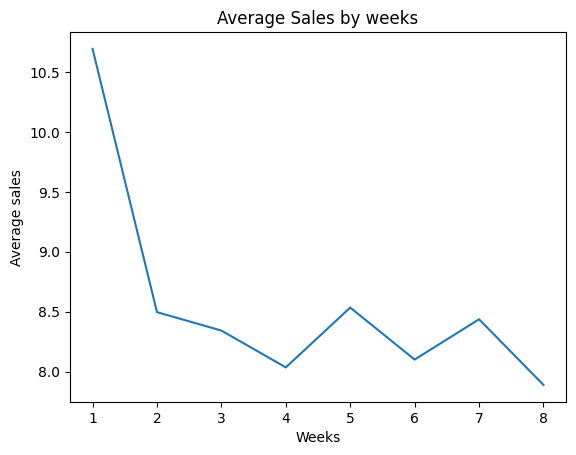

In [74]:
plt.plot(avg_sales_by_week.index, avg_sales_by_week.values)
plt.title("Average Sales by weeks")
plt.xlabel("Weeks")
plt.ylabel("Average sales")
plt.show()

Average sales was high in the first week of the year comparable to the rest 7 weeks

Total sales with and without promotions.

In [79]:
avg_sales_promotions = dataset.groupby(by='onpromotion')['unit_sales'].sum()
avg_sales_promotions

onpromotion
0    7713720.166
1    9388332.336
Name: unit_sales, dtype: float64

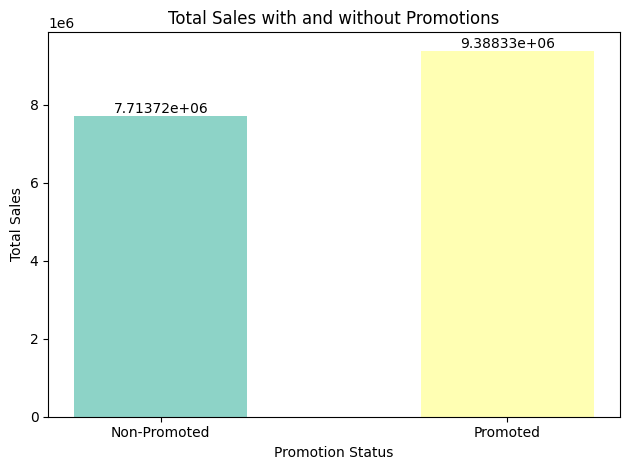

In [101]:
# plt.figure(figsize=(8, 6))
bars = plt.bar(['Non-Promoted', 'Promoted'], avg_sales_promotions.values, color=plt.cm.Set3.colors, width=0.5)
plt.bar_label(bars)
plt.title("Total Sales with and without Promotions")
plt.xlabel("Promotion Status")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()